# Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
appartments_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

We read the csv file using pandas and store the data in our dataframe "appartments_df".

In [3]:
appartments_df.loc[:, "ppsqm"] = (appartments_df["soldPrice"]/appartments_df["livingArea"]).round()
appartments_df

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/,52329.0
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,65417.0
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/,75432.0
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/,75234.0
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,82759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/,56731.0
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/,44900.0
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/,63043.0
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/,39286.0


Table with new column "ppsqm" (price per square meter) added.

In [4]:
relevant_app_df = appartments_df[["soldPrice", "livingArea", "location.address.streetAddress", "location.distance.ocean", "constructionYear", "booliId", "floor", "ppsqm"]]

In [5]:
sorted_app_df = relevant_app_df.sort_values("ppsqm", ascending = False)
sorted_app_df.head(5)

,soldPrice,livingArea,location.address.streetAddress,location.distance.ocean,constructionYear,booliId,floor,ppsqm
67,2500000,24.0,Ekhagsvägen 8,161,1935.0,2018259,3.0,104167.0
50,2450000,24.0,Ekhagsvägen 8,161,1935.0,2125576,3.0,102083.0
54,2300000,23.0,Ekhagsvägen 10,135,1935.0,2078171,1.0,100000.0
34,2210000,25.0,Torphagsvägen 4,218,1936.0,2330886,0.0,88400.0
55,2300000,26.9,Docentbacken 1B,298,1968.0,2067384,2.0,85502.0


Sorted dataframe by price per square meters with the highest price at the top, and displayed the five highest.

In [6]:
filtered_app_df = sorted_app_df.dropna(subset = "ppsqm")

Filter out entries without a price per square meter, due to missing livingarea or sold price to get a more accurate average price.

We add up the sum of all prices per square meter and divide by the number of appartments sold, which gives us an average of approximately $58759$.

In [7]:
print((filtered_app_df["ppsqm"].sum()/len(filtered_app_df)).round())

58759.0


<Axes: xlabel='livingArea', ylabel='ppsqm'>

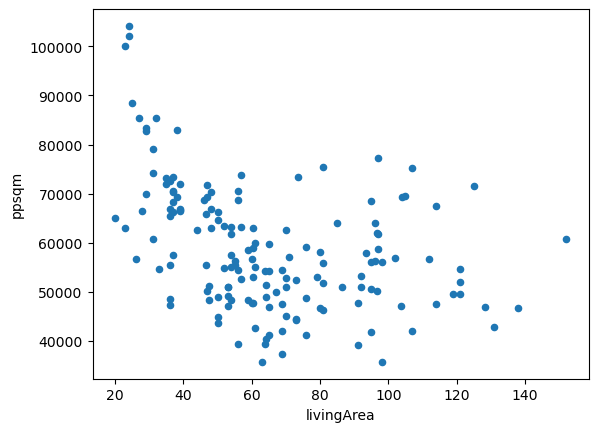

In [8]:
sorted_app_df.plot.scatter("livingArea", "ppsqm")

An interesting part of the dataset could be that the price per square meter doesn't seem to be affected that much by the size of the appartment, with the exception of the smallest appartments as we can see that the 10 most expensive appartments per price per square meters are all less than or around 40$m^2$.

In [9]:
val_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep = ";", decimal = ",")

We read the csv file using pandas and store the data in the dataframe "val_df".

In [10]:
filtered_val_df = val_df.loc[val_df["LÄNSNAMN"] == "Stockholms län"] 
grouped_val_df = filtered_val_df.groupby("LÄNSNAMN").sum("RÖSTERGILTIGA")
relevant_val_df = grouped_val_df[["RÖSTER GILTIGA"]]
relevant_val_df

,RÖSTER GILTIGA
LÄNSNAMN,
Stockholms län,1426237


We filter out all municipalities in Stockholms län, group them together summing up the total legitimate votes.
We then select the relevant columns and present it in the table.

In [11]:
soc_val_df = val_df.sort_values("S", ascending = False)
soc_val_df.head(1)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,8.33,8.12,2.91,3.93,52.18,6.11,...,NaN,NaN,NaN,NaN,1.02,NaN,2340,2364,2777,85.13


We sort the original dataframe by the values in the column corresponding to votes for the social democrats and get that the highest voting percentage is $52,18%$ in Munkfors.

In [12]:
val_df.loc[:, "VALDELTAGANDE"] = (val_df["RÖSTANDE"]/val_df["RÖSTBERÄTTIGADE"]).round(3)
turnout_val_df = val_df[["LÄNSNAMN", "KOMMUNNAMN", "RÖSTANDE", "RÖSTBERÄTTIGADE", "VALDELTAGANDE"]]
turnout_val_df.sort_values("VALDELTAGANDE", ascending = False).head(3)

,LÄNSNAMN,KOMMUNNAMN,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
103,Skåne län,Lomma,16492,17570,0.939
59,Jönköpings län,Habo,7825,8382,0.934
98,Skåne län,Vellinge,25360,27231,0.931


We create a new column "VALDELTAGANDE" which is amount of votes divided by potential voters, we then sort the table by the new column, and present the three highest.

In [13]:
stroke_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

We read the csv file using pandas and store the data in our dataframe "stroke_df".

I suspect there should be a correlation between hypertension and strokes. I therefore filter out two dataframes from the original, one where everyone has hypertension and one where no one does.
To see if there is a correlation divide the number of people with strokes by the amount of people in each list and present these ratios in the following barplot.

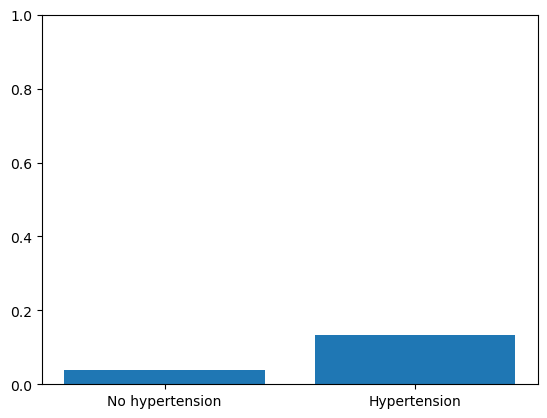

In [14]:
hyper1_df = stroke_df.loc[stroke_df["hypertension"] == 1] 
hyper0_df = stroke_df.loc[stroke_df["hypertension"] == 0]

x = np.array(["No hypertension","Hypertension"])
y = np.array([hyper0_df["stroke"].sum()/len(hyper0_df),hyper1_df["stroke"].sum()/len(hyper1_df)])
plt.bar(x, y)
plt.ylim(0,1)
plt.show()


We can, as suspected, clearly see that there is a strong correlation between hypertension and strokes.